# Colorizing the Russian Empire

Automatically produce a color image from the digitized Prokudin-Gorskii glass plate images with as few visual artifacts as possible.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_image(fname):
    img = cv2.imread(fname, 0)
    height = int(img.shape[0]/3)
    width = img.shape[1]
    rgb_img = np.zeros((height, width, 3), dtype=np.uint8)
    for i in range(3):
        rgb_img[:,:,2-i] = img[height*i:height*(i+1),:]
    return rgb_img, height, width

In [3]:
def get_gradient(im) :
    # Calculate the x and y gradients using Sobel operator
    grad_x = cv2.Sobel(im,cv2.CV_32F,1,0,ksize=3)
    grad_y = cv2.Sobel(im,cv2.CV_32F,0,1,ksize=3)
    # Combine the two gradients
    grad = cv2.addWeighted(np.absolute(grad_x), 0.5, np.absolute(grad_y), 0.5, 0)
    return grad

In [4]:
def align_image(rgb_img, height, width, warp_mode, number_of_iterations, termination_eps):
    # Allocate space for aligned image
    im_aligned = np.zeros((height,width,3), dtype=np.uint8 )

    # The blue and green channels will be aligned to the red channel.
    # So copy the red channel
    im_aligned[:,:,0] = rgb_img[:,:,0]

    # Set the warp matrix to identity.
    if warp_mode == cv2.MOTION_HOMOGRAPHY :
            warp_matrix = np.eye(3, 3, dtype=np.float32)
    else :
            warp_matrix = np.eye(2, 3, dtype=np.float32)

    # Set the stopping criteria for the algorithm.
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

    # Warp the blue and green channels to the red channel
    for i in range(1,3) :
        (cc, warp_matrix) = cv2.findTransformECC (get_gradient(rgb_img[:,:,0]), get_gradient(rgb_img[:,:,i]),warp_matrix, warp_mode, criteria)

        if warp_mode == cv2.MOTION_HOMOGRAPHY :
            # Use Perspective warp when the transformation is a Homography
            im_aligned[:,:,i] = cv2.warpPerspective (rgb_img[:,:,i], warp_matrix, (width,height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
        else :
            # Use Affine warp when the transformation is not a Homography
            im_aligned[:,:,i] = cv2.warpAffine(rgb_img[:,:,i], warp_matrix, (width, height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
        print(warp_matrix)
    return im_aligned


In [5]:
warp_mode = cv2.MOTION_TRANSLATION
# warp_mode = cv2.MOTION_EUCLIDEAN
# warp_mode = cv2.MOTION_AFFINE
# warp_mode = cv2.MOTION_HOMOGRAPHY
number_of_iterations = 5000
termination_eps = 1e-10

[[ 1.          0.         -0.11082561]
 [ 0.          1.          6.748881  ]]
[[ 1.         0.        -1.2234675]
 [ 0.         1.        12.595102 ]]


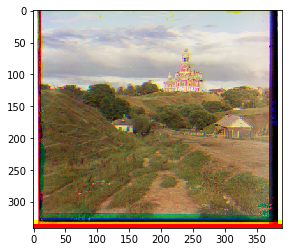

In [6]:
img, h, w = read_image("./hw2_data/task3_colorizing_edit/cathedral.jpg")
result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
plt.imshow(result)
plt.show()

[[ 1.         0.        -1.6091725]
 [ 0.         1.        52.981937 ]]
[[ 1.         0.        -3.8900774]
 [ 0.         1.        59.855957 ]]


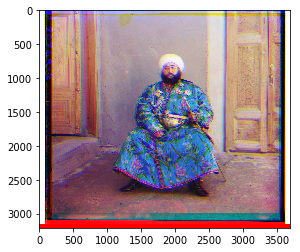

In [7]:
img, h, w = read_image("./hw2_data/task3_colorizing_edit/emir.jpg")
result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
plt.imshow(result)
plt.show()

[[ 1.        0.        5.171987]
 [ 0.        1.       48.23466 ]]
[[ 1.        0.       22.7552  ]
 [ 0.        1.       89.781296]]


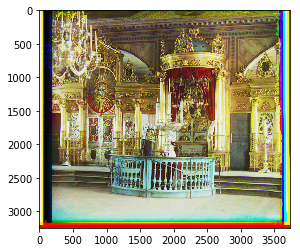

In [8]:
img, h, w = read_image("./hw2_data/task3_colorizing_edit/icon.jpg")
result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
plt.imshow(result)
plt.show()

[[ 1.        0.        3.143395]
 [ 0.        1.       19.819788]]
[[  1.         0.       -20.679396]
 [  0.         1.        18.838663]]


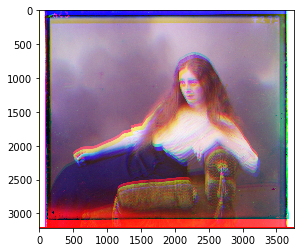

In [9]:
img, h, w = read_image("./hw2_data/task3_colorizing_edit/lady.jpg")
result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
plt.imshow(result)
plt.show()

[[ 1.        0.        3.921172]
 [ 0.        1.       96.023224]]
[[  1.        0.        9.65321]
 [  0.        1.      102.86882]]


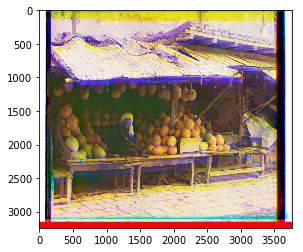

In [10]:
img, h, w = read_image("./hw2_data/task3_colorizing_edit/melons.jpg")
result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
plt.imshow(result)
plt.show()

[[1.        0.        0.4703528]
 [0.        1.        6.2519264]]
[[1.        0.        0.9739604]
 [0.        1.        3.444469 ]]


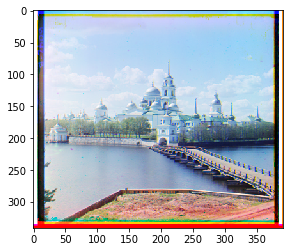

In [11]:
img, h, w = read_image("./hw2_data/task3_colorizing_edit/monastery.jpg")
result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
plt.imshow(result)
plt.show()

[[1.         0.         0.21742934]
 [0.         1.         5.0144773 ]]
[[1.        0.        1.2294352]
 [0.        1.        9.039939 ]]


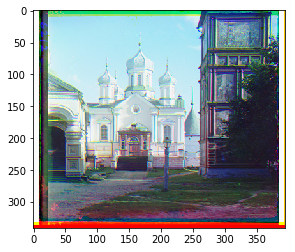

In [12]:
img, h, w = read_image("./hw2_data/task3_colorizing_edit/nativity.jpg")
result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
plt.imshow(result)
plt.show()

[[ 1.          0.         -0.69245166]
 [ 0.          1.          6.6975102 ]]
[[ 1.         0.        -2.3693209]
 [ 0.         1.         7.1484346]]


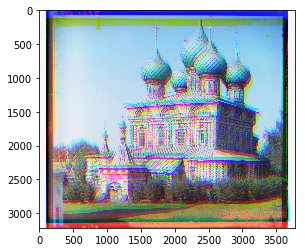

In [13]:
img, h, w = read_image("./hw2_data/task3_colorizing_edit/onion_church.jpg")
result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
plt.imshow(result)
plt.show()

[[ 1.         0.         2.1377442]
 [ 0.         1.        15.066503 ]]
[[ 1.        0.       -1.036981]
 [ 0.        1.       15.066888]]


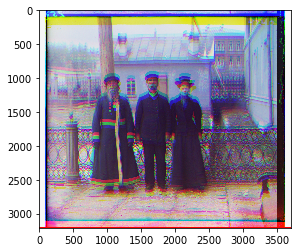

In [14]:
img, h, w = read_image("./hw2_data/task3_colorizing_edit/three_generations.jpg")
result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
plt.imshow(result)
plt.show()

[[1.        0.        0.9113628]
 [0.        1.        3.699945 ]]
[[1.        0.        3.138938 ]
 [0.        1.        6.8005366]]


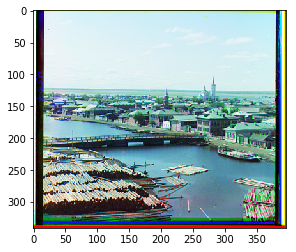

In [15]:
img, h, w = read_image("./hw2_data/task3_colorizing_edit/tobolsk.jpg")
result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
plt.imshow(result)
plt.show()

[[ 1.         0.         2.6084127]
 [ 0.         1.        38.799145 ]]
[[ 1.         0.         3.2152567]
 [ 0.         1.        67.63378  ]]


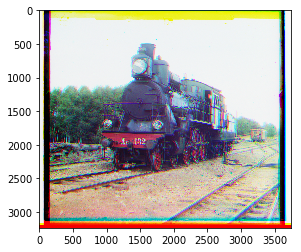

In [16]:
img, h, w = read_image("./hw2_data/task3_colorizing_edit/train.jpg")
result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
plt.imshow(result)
plt.show()

[[ 1.         0.        -7.8597503]
 [ 0.         1.        72.92736  ]]
[[  1.         0.       -15.674445]
 [  0.         1.        86.7551  ]]


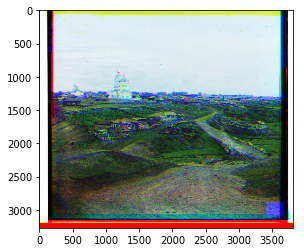

In [17]:
img, h, w = read_image("./hw2_data/task3_colorizing_edit/village.jpg")
result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
plt.imshow(result)
plt.show()

[[  1.         0.       -12.449465]
 [  0.         1.        13.937692]]
[[  1.         0.       -12.084384]
 [  0.         1.        16.473211]]


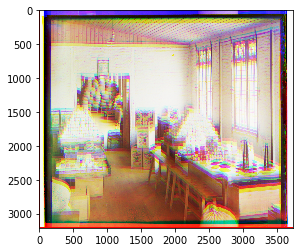

In [18]:
img, h, w = read_image("./hw2_data/task3_colorizing_edit/workshop.jpg")
result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
plt.imshow(result)
plt.show()